# Data operation with pandas
Demo, showing python pandas data analysis, visualization and processing library.

Victor Kitov, <v.v.kitov@yandex.ru>, <https://victorkitov.github.io>

# Table of contents

* [Data operation with pandas](#Data-operation-with-pandas)
* [Series](#Series)
 * [Slicing Series](#Slicing-Series)
 * [Combining series](#Combining-series)
 * [Quick Series analysis](#Quick-Series-analysis)
 * [Distribution of Series](#Distribution-of-Series)
  * [Series with continuous values](#Series-with-continuous-values)
  * [Series with discrete values](#Series-with-discrete-values)
* [DataFrame](#DataFrame)
 * [Slicing](#Slicing)
 * [Index by row and column numbers](#Index-by-row-and-column-numbers)
 * [Quick analysis](#Quick-analysis)
 * [Applying functions to DataFrame](#Applying-functions-to-DataFrame)
 * [Database-like joining](#Database-like-joining)
* [Analysing transactional data](#Analysing-transactional-data)
 * [Grouping data](#Grouping-data)
 * [Pivot tables](#Pivot-tables)
 * [Add columns to the hierarchical index](#Add-columns-to-the-hierarchical-index)
* [Visualization of dataframes](#Visualization-of-dataframes)
* [Saving/loading from file](#Saving/loading-from-file)
* [More](#More)

In [191]:
%pylab inline
%precision 3

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


'%.3f'

In [192]:
import pandas as pd

pandas is a python module, providing easy interpretable operations for 
data analytics and data preprocessing.

Key types:
* Series (a list)
* DataFrame (a matrix)

Also there a less used types for storing 3D and 4D data

# Series

In [197]:
s = pd.Series(['A','B','C','D','E'], index=['a','b','c','d','e'])
s

a    A
b    B
c    C
d    D
e    E
dtype: object

In [194]:
s['b']

'B'

In [5]:
s.iat[1] # first element has index 0, as usual in python

'B'

In [6]:
s.dtype  # dtype=object

dtype('O')

In [7]:
s.values  # transform values to numpy array

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [8]:
s.index.values  # transform index to numpy array

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [9]:
len(s)

5

## Slicing Series

In [10]:
s

a    A
b    B
c    C
d    D
e    E
dtype: object

In [11]:
s[:'c']  # includes last element

a    A
b    B
c    C
dtype: object

In [12]:
s<='C'  # compares values (not index)

a     True
b     True
c     True
d    False
e    False
dtype: bool

In [14]:
s[s<='C']  # selection by condition

a    A
b    B
c    C
dtype: object

## Combining series

In [198]:
pd.concat([s,s,s])

a    A
b    B
c    C
d    D
e    E
a    A
b    B
c    C
d    D
e    E
a    A
b    B
c    C
d    D
e    E
dtype: object

In [16]:
pd.concat([s,s], ignore_index=True)  # recreates index by simple numbering of elements

0    A
1    B
2    C
3    D
4    E
5    A
6    B
7    C
8    D
9    E
dtype: object

## Quick Series analysis

In [17]:
s_long = pd.Series(range(1000,2000))  # some long Series

In [18]:
len(s_long)

1000

In [19]:
s_long.head(3)   # first 3 elements

0    1000
1    1001
2    1002
dtype: int64

In [20]:
s_long.tail()   # last elements

995    1995
996    1996
997    1997
998    1998
999    1999
dtype: int64

In [21]:
s_long.describe()   # summary statistics

count    1000.000000
mean     1499.500000
std       288.819436
min      1000.000000
25%      1249.750000
50%      1499.500000
75%      1749.250000
max      1999.000000
dtype: float64

Each statistic can be retrieved individually:

In [22]:
# статистики можно вычислять напрямую:

s_long.min(), s_long.max(), s_long.mean(), s_long.std(), s_long.median()    

(1000, 1999, 1499.500, 288.819, 1499.500)

In [23]:
# операции numpy тоже работают:

min(s_long), max(s_long), mean(s_long), std(s_long), median(s_long)

(1000, 1999, 1499.500, 288.675, 1499.500)

## Distribution of Series

### Series with continuous values

<Axes: ylabel='Frequency'>

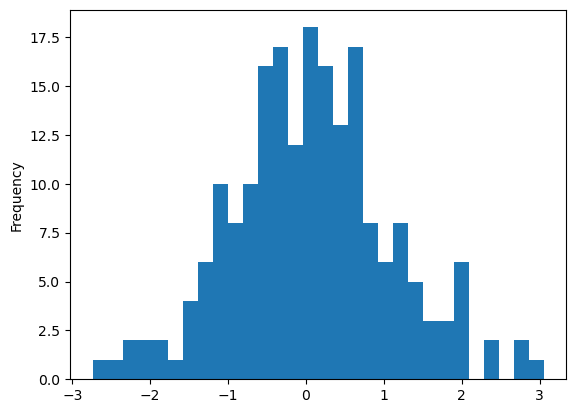

In [142]:
s = pd.Series(randn(200))
s.plot.hist(bins=30)

<Axes: ylabel='Density'>

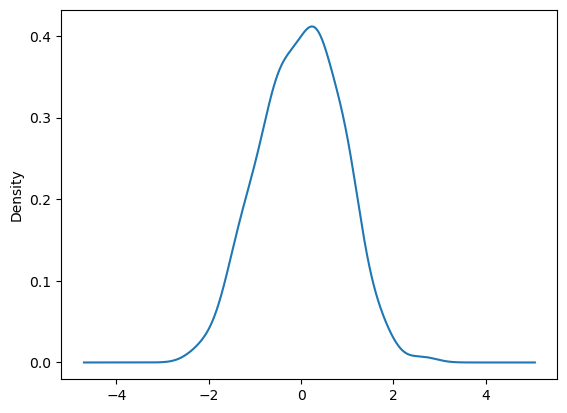

In [144]:
s = pd.Series(randn(200))
s.plot.kde()   # сглаженная плотность (kenrel density estimation)

### Series with discrete values

In [26]:
s = pd.Series([1,2,3,2,1,1,1])
s

0    1
1    2
2    3
3    2
4    1
5    1
6    1
dtype: int64

In [27]:
unique(s)    # уникальные значения

array([1, 2, 3])

In [28]:
unique(s, return_counts=1)   # уникальные значения со счётчиками встречаемости

(array([1, 2, 3]), array([4, 2, 1]))

In [29]:
s.value_counts()  # returns unique values and their occurence counts as pandas series

1    4
2    2
3    1
Name: count, dtype: int64

# DataFrame

DataFrame stores 2D matrix data.
* rows are referenced by index
* columns are referenced by column names

In [200]:
df=pd.DataFrame(diag(range(1,6)),index=['a','b','c','d','e'], columns=['A','B','C','D','E'])
df

,A,B,C,D,E
a,1,0,0,0,0
b,0,2,0,0,0
c,0,0,3,0,0
d,0,0,0,4,0
e,0,0,0,0,5


In [201]:
df.T  # transpose, i.e. exchange rows and columns

,a,b,c,d,e
A,1,0,0,0,0
B,0,2,0,0,0
C,0,0,3,0,0
D,0,0,0,4,0
E,0,0,0,0,5


In [202]:
df

,A,B,C,D,E
a,1,0,0,0,0
b,0,2,0,0,0
c,0,0,3,0,0
d,0,0,0,4,0
e,0,0,0,0,5


In [160]:
df['B'] # select column (имя колонки может на русском и с пробелами)

a    0
b    2
c    0
d    0
e    0
Name: B, dtype: int64

In [161]:
df.B  # also selects column (имя колонки латиницей и без пробелов)

a    0
b    2
c    0
d    0
e    0
Name: B, dtype: int64

In [162]:
df.B.values   # return column values as numpy array

array([0, 2, 0, 0, 0])

In [163]:
df.loc['b']  # references row, returns Series

A    0
B    2
C    0
D    0
E    0
Name: b, dtype: int64

In [164]:
df.loc['b'].values    # references row, returns numpy array

array([0, 2, 0, 0, 0])

In [165]:
df.loc['b','B']  # selection by row and column

2

In [156]:
df.at['b','B']   # the same but faster way to return a scalar

2

In [167]:
df.loc['b':'d','B':'D']   # можно выделять блоки

,B,C,D
b,2,0,0
c,0,3,0
d,0,0,4


## Slicing

In [203]:
df

,A,B,C,D,E
a,1,0,0,0,0
b,0,2,0,0,0
c,0,0,3,0,0
d,0,0,0,4,0
e,0,0,0,0,5


In [208]:
df.loc['b']

A    0
B    2
C    0
D    0
E    0
Name: b, dtype: int64

In [206]:
df['B']  # по столбцам

a    0
b    2
c    0
d    0
e    0
Name: B, dtype: int64

In [210]:
df[:'b']  # по строкам, slice by rows, slice end IS included

,A,B,C,D,E
a,1,0,0,0,0
b,0,2,0,0,0


In [40]:
df.loc[:'b'] # slice by rows, slice end IS included

,A,B,C,D
a,1,0,0,0
b,0,2,0,0


In [211]:
df.loc[:,'B':'D']  # slice by columns, slice end IS included

,B,C,D
a,0,0,0
b,2,0,0
c,0,3,0
d,0,0,4
e,0,0,0


In [212]:
df.loc['b','D']  # select particular element

0

## Index by row and column numbers

In [46]:
df

,A,B,C,D
a,1,0,0,0
b,0,2,0,0
c,0,0,3,0
d,0,0,0,4


In [47]:
df.iloc[1]  # 2nd row

A    0
B    2
C    0
D    0
Name: b, dtype: int64

In [48]:
df.iloc[:,1]   # 2nd column

a    0
b    2
c    0
d    0
Name: B, dtype: int64

In [49]:
df.iloc[1,1]

2

In [50]:
df.iat[1,1]  #  the same but works faster to extract a scalar

2

In [44]:
df.iloc[:2,:2]   # excludes last index

,A,B
a,1,0
b,0,2


In [168]:
df.iloc[1:3,1:3]   # excludes last index

,B,C
b,2,0
c,0,3


## Extract index and columns

In [51]:
df.index  # returns pandas Index object

Index(['a', 'b', 'c', 'd'], dtype='object')

In [52]:
df.index.values   # returns index as numpy array

array(['a', 'b', 'c', 'd'], dtype=object)

In [53]:
df.columns   # returns columns as pandas Index object

Index(['A', 'B', 'C', 'D'], dtype='object')

In [54]:
df.columns.values   # returns columns as numpy array

array(['A', 'B', 'C', 'D'], dtype=object)

## Quick analysis

In [213]:
long_df=pd.DataFrame(randn(1000,4),columns=['feature_%s'%i for i in range(1,5)])

In [214]:
long_df.head()

,feature_1,feature_2,feature_3,feature_4
0,1.078043,1.009864,-0.483080,-0.333166
1,0.789500,0.492062,0.520995,-1.664418
2,-1.179730,0.706769,0.814674,-2.737268
3,0.382486,-0.138760,0.736080,0.504606
4,-0.191421,-1.086662,0.493693,-0.316916


In [59]:
long_df.head(3)

,feature_1,feature_2,feature_3,feature_4
0,-0.010394,-0.144220,1.003189,0.010818
1,0.971868,-0.051652,-1.163856,-0.977794
2,0.439156,-0.296934,1.422007,0.718824


In [171]:
long_df.tail(2)

,feature_1,feature_2,feature_3,feature_4
998,-0.217834,0.30893,-0.507107,0.092226
999,0.846932,0.20323,-0.467770,-0.110304


In [60]:
long_df.describe()  # count describes the number of non-NaN values

,feature_1,feature_2,feature_3,feature_4
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.004556,-0.018073,-0.064095,-0.045083
std,1.030125,1.000099,0.968411,1.013193
min,-2.692062,-2.875322,-2.829597,-3.152332
25%,-0.724159,-0.653982,-0.673977,-0.714921
50%,0.001183,-0.058491,-0.057776,-0.052049
75%,0.720036,0.640779,0.627308,0.614385
max,3.207468,3.190598,2.760063,3.248775


In [61]:
df.mean()  # along 0 dimension (rows), mean for each column

A    0.25
B    0.50
C    0.75
D    1.00
dtype: float64

In [62]:
df.mean(axis=1)  # mean along 1st dimension (columns), mean for each row

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [215]:
pd.concat([df,df,df],axis=1)

,A,B,C,D,E,A,B,C,D,E,A,B,C,D,E
a,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
b,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0
c,0,0,3,0,0,0,0,3,0,0,0,0,3,0,0
d,0,0,0,4,0,0,0,0,4,0,0,0,0,4,0
e,0,0,0,0,5,0,0,0,0,5,0,0,0,0,5


In [65]:
pd.concat([df,df], ignore_index=True)  # recreates index as 0,1,2,3,... by enumerating rows

,A,B,C,D
0,1,0,0,0
1,0,2,0,0
2,0,0,3,0
3,0,0,0,4
4,1,0,0,0
5,0,2,0,0
6,0,0,3,0
7,0,0,0,4


## Applying functions to DataFrame

In [221]:
df=pd.DataFrame({'A':arange(5),'B':arange(10,15)})
df

,A,B
0,0,10
1,1,11
2,2,12
3,3,13
4,4,14


In [67]:
def fun(x):
    return x**2

In [217]:
df.apply(lambda x:x**2)  # applies for each column, elementwise function produces DataFrame

,A,B
0,0,100
1,1,121
2,4,144
3,9,169
4,16,196


In [218]:
df.apply(fun)

,A,B
0,0,100
1,1,121
2,4,144
3,9,169
4,16,196


In [69]:
df.apply(lambda x:max(x))   # applies for each column, aggregation function produces Series

A     4
B    14
dtype: int64

In [222]:
df.apply(lambda x:max(x), axis=1)   # apply to each row

0    10
1    11
2    12
3    13
4    14
dtype: int64

In [71]:
df.T.apply(lambda x:max(x))   # the same: apply to each row

0    10
1    11
2    12
3    13
4    14
dtype: int64

## Database-like joining

In [73]:
left = pd.DataFrame({'name':['Bob','Alice','Sara','John'],'age':[23,34,27,18]})
left

,name,age
0,Bob,23
1,Alice,34
2,Sara,27
3,John,18


In [74]:
right = pd.DataFrame({'name':['Andrew','Alice','Sara','John'], 'height':[185,170,180,165]})
right

,name,height
0,Andrew,185
1,Alice,170
2,Sara,180
3,John,165


In [75]:
pd.merge(left, right, on='name')

,name,age,height
0,Alice,34,170
1,Sara,27,180
2,John,18,165


In [76]:
pd.merge(left, right, on='name', how='outer')

,name,age,height
0,Alice,34.0,170.0
1,Andrew,NaN,185.0
2,Bob,23.0,NaN
3,John,18.0,165.0
4,Sara,27.0,180.0


**how='left'**: take all entries from left and matching from right DataFrame

**how='right'**: take all entries from right and matching from left DataFrame    

# Агрегация значений

In [10]:
df=pd.DataFrame({'Sex':['Male','Female']*4,
                'Payment':['cash','card','cash','card','cash','card','card','cash'],
                'Amount':[1,2,3,4,5,6,7,8]})
df

,Sex,Payment,Amount
0,Male,cash,1
1,Female,card,2
2,Male,cash,3
3,Female,card,4
4,Male,cash,5
5,Female,card,6
6,Male,card,7
7,Female,cash,8


In [12]:
df[['Sex','Amount']]   # выбираем нужные колонки

,Sex,Amount
0,Male,1
1,Female,2
2,Male,3
3,Female,4
4,Male,5
5,Female,6
6,Male,7
7,Female,8


In [17]:
df[['Sex','Amount']].groupby(["Sex"]).sum()    # сумма платежей

,Amount
Sex,
Female,20
Male,16


In [20]:
df[['Sex','Amount']].groupby(["Sex"]).mean()  # средний платеж

,Amount
Sex,
Female,5.0
Male,4.0


In [19]:
df[['Sex','Amount']].groupby(["Sex"]).count()  # количество транзакций

,Amount
Sex,
Female,4
Male,4


#### Иерархическая агрегация

In [14]:
df[['Sex','Payment','Amount']].groupby(['Sex','Payment']).sum()

Amount
Sex    Payment        
Female card         12
       cash          8
Male   card          7
       cash          9

In [16]:
df[['Sex','Payment','Amount']].groupby(['Sex','Payment']).count()

Amount
Sex    Payment        
Female card        4.0
       cash        8.0
Male   card        7.0
       cash        3.0

# Analysing transactional data

## Assignement by reference and by value

### Метод 1 (по ссылке)

In [236]:
A=pd.DataFrame(eye(3),index=list('abc'),columns=list('ABC'))
B=A
B

,A,B,C
a,1.0,0.0,0.0
b,0.0,1.0,0.0
c,0.0,0.0,1.0


In [237]:
B.loc['a','A']=1000
A   # assignment by reference, so affects both logs and df!

,A,B,C
a,1000.0,0.0,0.0
b,0.0,1.0,0.0
c,0.0,0.0,1.0


### Метод 2 (по ссылке!)

In [239]:
A=pd.DataFrame(eye(3),index=list('abc'),columns=list('ABC'))
B=pd.DataFrame(A)
B

,A,B,C
a,1.0,0.0,0.0
b,0.0,1.0,0.0
c,0.0,0.0,1.0


In [240]:
B.loc['a','A']=1000
A   # assignment by reference, so affects both logs and df!

,A,B,C
a,1000.0,0.0,0.0
b,0.0,1.0,0.0
c,0.0,0.0,1.0


### Метод 3 (по значению)

In [241]:
A=pd.DataFrame(eye(3),index=list('abc'),columns=list('ABC'))
B=A.copy()
B

,A,B,C
a,1.0,0.0,0.0
b,0.0,1.0,0.0
c,0.0,0.0,1.0


In [242]:
B.loc['a','A']=1000
A   # assignment by value

,A,B,C
a,1.0,0.0,0.0
b,0.0,1.0,0.0
c,0.0,0.0,1.0


## Сводные таблицы (pivot tables)

In [243]:
df=pd.DataFrame({'Sex':['Male','Female']*4,
                 'City':['Moscow','Moscow','London','London']*2,
                'Payment':['cash','card','cash','card','cash','card','card','cash'],
                'Amount':[1,2,3,4,5,6,7,8]})
df

,Sex,City,Payment,Amount
0,Male,Moscow,cash,1
1,Female,Moscow,card,2
2,Male,London,cash,3
3,Female,London,card,4
4,Male,Moscow,cash,5
5,Female,Moscow,card,6
6,Male,London,card,7
7,Female,London,cash,8


In [246]:
pd.pivot_table(df, index=['City'], columns=['Sex'], values=['Amount'], aggfunc='sum', margins=True)

Amount         
Sex    Female Male All
City                  
London     12   10  22
Moscow      8    6  14
All        20   16  36

In [249]:
pd.pivot_table(df, index=['City'], columns=['Sex','Payment'], values=['Amount'], aggfunc='sum', margins=True)

Amount                   
Sex     Female      Male      All
Payment   card cash card cash    
City                             
London     4.0  8.0  7.0  3.0  22
Moscow     8.0  NaN  NaN  6.0  14
All       12.0  8.0  7.0  9.0  36

## Расчёт числа значений по группам

In [263]:
# Рассчитаем число событий разных типов (aggfunc='count')
pd.pivot_table(df, index=['Sex'], columns=['Payment'], values=['Amount'], aggfunc='count', margins=False)

Amount     
Payment   card cash
Sex                
Female       3    1
Male         1    3

In [264]:
# эквивалентная компактная запись:
pd.crosstab(df['Sex'], df['Payment'])

Payment,card,cash
Sex,,
Female,3,1
Male,1,3


In [265]:
pd.crosstab([df['City'], df['Sex']], df['Payment'])

Payment        card  cash
City   Sex               
London Female     1     1
       Male       1     1
Moscow Female     2     0
       Male       0     2

## Пропорции числа событий

In [266]:
# доля среди всех событий:
pd.crosstab([df['City'], df['Sex']], df['Payment'], normalize='all')

Payment         card   cash
City   Sex                 
London Female  0.125  0.125
       Male    0.125  0.125
Moscow Female  0.250  0.000
       Male    0.000  0.250

In [268]:
# доля каждого метода оплаты в рамках города и пола:
pd.crosstab([df['City'], df['Sex']], df['Payment'], normalize='index')

Payment        card  cash
City   Sex               
London Female   0.5   0.5
       Male     0.5   0.5
Moscow Female   1.0   0.0
       Male     0.0   1.0

In [267]:
# доля города и пола в рамках каждого метода оплаты:
pd.crosstab([df['City'], df['Sex']], df['Payment'], normalize='columns')

Payment        card  cash
City   Sex               
London Female  0.25  0.25
       Male    0.25  0.25
Moscow Female  0.50  0.00
       Male    0.00  0.50

## Add columns to the hierarchical index

In [259]:
p = pd.pivot_table(df, index=['City'], columns=['Sex','Payment'], values=['Amount'], aggfunc='sum')
p

Amount               
Sex     Female      Male     
Payment   card cash card cash
City                         
London     4.0  8.0  7.0  3.0
Moscow     8.0  NaN  NaN  6.0

Transfer columns to index:

In [261]:
p2 = p.stack(['Sex','Payment'],future_stack=True)
p2

Amount
City   Sex    Payment        
London Female card        4.0
              cash        8.0
       Male   card        7.0
              cash        3.0
Moscow Female card        8.0
              cash        NaN
       Male   card        NaN
              cash        6.0

Now can easily access individual values:

In [262]:
p2.loc['London','Male','cash']

Amount    3.0
Name: (London, Male, cash), dtype: float64

# Visualization of dataframes

In [183]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A', 'B', 'C', 'D'])

In [184]:
df=pd.DataFrame(diag(range(1,5)),index=['row_1','row_2','row_3','row_4'], columns=['col_1','col_2','col_3','col_4'], dtype=float)
df.at['row_1','col_2']=NaN
df

,col_1,col_2,col_3,col_4
row_1,1.0,NaN,0.0,0.0
row_2,0.0,2.0,0.0,0.0
row_3,0.0,0.0,3.0,0.0
row_4,0.0,0.0,0.0,4.0


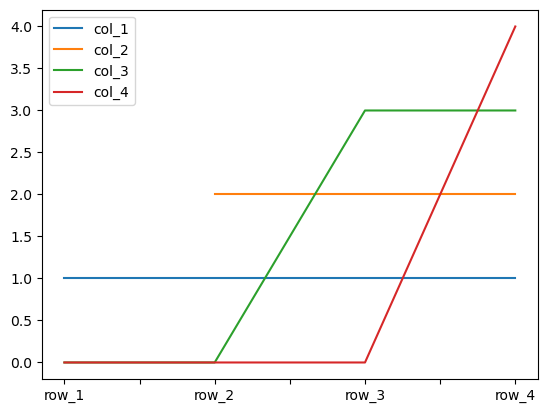

In [185]:
df = df.cumsum()
df.plot();

In [186]:
df = pd.DataFrame({'Boys height':[130,145,180],'Girls height':[140,150,160]},index=[1,2,3])
df

,Boys height,Girls height
1,130,140
2,145,150
3,180,160


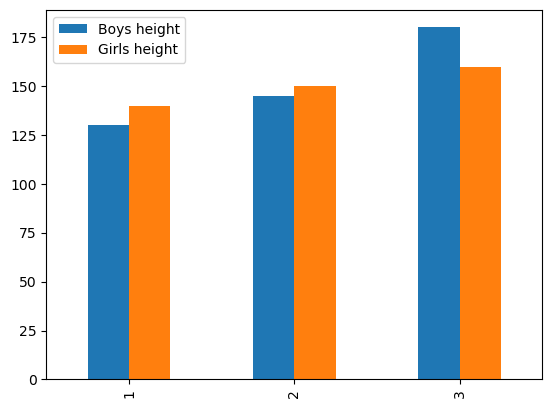

In [187]:
df.plot.bar();

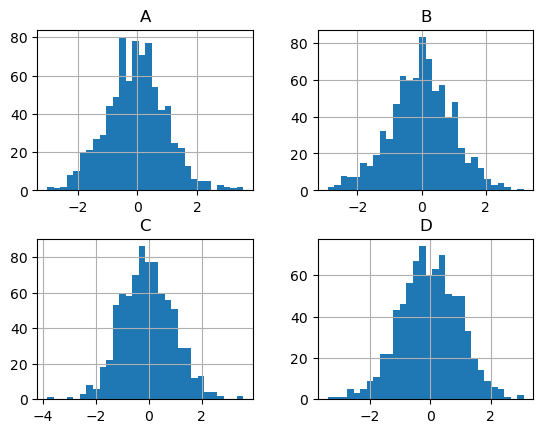

In [232]:
df = pd.DataFrame(np.random.randn(800, 4), columns=['A', 'B', 'C', 'D'])

df.hist(bins=30);

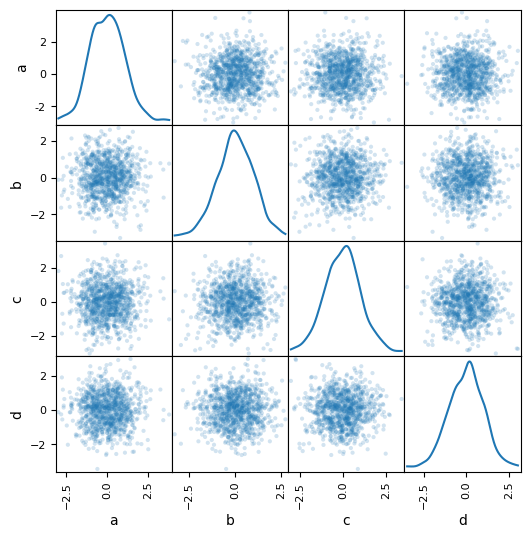

In [189]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde');

# Saving/loading from file

In [132]:
df=pd.DataFrame(eye(3),columns=['a','b','c'])
df

,a,b,c
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [133]:
df.to_csv('foo.csv')

In [134]:
df=pd.read_csv('foo.csv')
df

,Unnamed: 0,a,b,c
0,0,1.0,0.0,0.0
1,1,0.0,1.0,0.0
2,2,0.0,0.0,1.0


# More

* [10 Minutes to pandas tutorial](http://pandas.pydata.org/pandas-docs/stable/10min.html)